In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box, Point
import pandas as pd
from sqlite3 import connect

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import cross_val_score


In [ ]:
locations = gpd.read_file("counties.geojson")
locations.head()

In [ ]:
#q1
len(locations['NAME'].unique())

In [3]:


# conn = connect(':memory:')
conn = connect('counties_tracts.db')

counties_tracts = pd.read_sql("""SELECT * FROM sqlite_master""", conn)
counties_tracts

,type,name,tbl_name,rootpage,sql
0,table,counties,counties,2,"CREATE TABLE ""counties"" (\n""index"" INTEGER,\n ..."
1,index,ix_counties_index,counties,3,"CREATE INDEX ""ix_counties_index""ON ""counties"" ..."
2,table,tracts,tracts,4,"CREATE TABLE ""tracts"" (\n""index"" INTEGER,\n ""..."
3,index,ix_tracts_index,tracts,5,"CREATE INDEX ""ix_tracts_index""ON ""tracts"" (""in..."


In [ ]:
counties = pd.read_sql("""SELECT * FROM counties""", conn)
counties.head()

In [ ]:
tracts = pd.read_sql("""SELECT * FROM tracts""", conn)
tracts.head()

In [ ]:
locations_arealand = locations.merge(counties, how="left", on="NAME")
# locations_arealand = locations.merge(counties[['NAME','AREALAND']], how="left", on="NAME")
locations_arealand.head()

In [ ]:
#q2
locations_arealand.plot(column="POP100",legend =True, cmap="viridis")

In [4]:



train, test = train_test_split(locations_arealand, test_size=0.25, random_state=320)

NameError: name 'locations_arealand' is not defined

In [ ]:
train.head()

In [ ]:
#q3
list(test['NAME'])

In [ ]:
#q4
lr = LinearRegression()
lr.fit(train[["AREALAND"]], train["POP100"])
lr.score(test[["AREALAND"]], test["POP100"])

In [ ]:
#q5
lr.predict([[1e6 * 500 * 2.59]])

In [ ]:
#q5
temporary = pd.DataFrame([1e6 * 500 * 2.59])
lr.predict(temporary)[0]

In [ ]:
grouped = tracts.groupby('COUNTY').sum().reset_index()
# grouped
grouped_formatted= grouped[['COUNTY', 'HU100']]
grouped_formatted = grouped_formatted.rename(columns={"HU100": "HUsummed"})
grouped_formatted

In [ ]:
locations_arealand_HU100  = locations_arealand.merge(grouped_formatted, how="left", on="COUNTY")
locations_arealand_HU100

In [ ]:
train_hu, test_hu = train_test_split(locations_arealand_HU100, test_size=0.25, random_state=320)

In [ ]:
list(test_hu['NAME'].unique())


In [ ]:
#q7
dict(zip(train_hu.NAME, train_hu.HUsummed))

In [ ]:
#q8
lr_hu = LinearRegression()
arr = cross_val_score(lr_hu, train_hu[["HUsummed"]],train_hu[["POP100"]],cv=5)
np.average(arr)

In [ ]:
#q9
np.std(arr)

In [ ]:
#q10
"POP100 = 2.39*HU100 + -7910.46"

In [ ]:
lr_hu.fit(train_hu[["HUsummed"]],train_hu[["POP100"]])
coef = lr_hu.coef_[0]
intercept = lr_hu.intercept_

In [ ]:
locations_arealand_HU100[['HUsummed', 'POP100']]

In [ ]:
dane = locations_arealand_HU100.loc[locations_arealand_HU100['NAME']=='Dane County']
dane[['HUsummed','POP100']]


In [ ]:
dane = locations_arealand_HU100.loc[locations_arealand_HU100['NAME']=='Dane County']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.scatter(locations_arealand_HU100['HUsummed'],locations_arealand_HU100['POP100'],label='Actual' )
ax.plot(locations_arealand_HU100['HUsummed'],locations_arealand_HU100['HUsummed']* coef+intercept,'red', label='predicted')
ax.legend()
ax.text(dane['HUsummed'],dane['POP100'], 'Dane',ha='left')
ax.set_xlabel("HU100")
ax.set_ylabel("POP100")


In [ ]:
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])


In [ ]:
A[np.where(A>= 2 & A<=5 )]

In [ ]:
len(A[np.where(np.logical_and(A>=2, A<=5))])


In [ ]:
counties

In [ ]:
milwaukee = locations_arealand_HU100.loc[locations_arealand_HU100['NAME']=='Milwaukee County']
milwaukee

<AxesSubplot:>

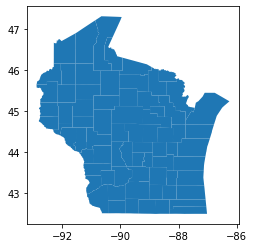

In [3]:
url = "counties.geojson"
dane = gpd.read_file(url)
dane.plot()


In [6]:
import rasterio
import rasterio.features
import rasterio.warp
from matplotlib.colors import ListedColormap
from rasterio.mask import mask

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

In [5]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}


In [80]:
land = rasterio.open("zip://./land.zip!wi.tif")  #매디슨 wi 전 지역 가져오기

# 밀워키 polygon 가져오기
counties = gpd.read_file('counties.geojson')
milwaukee = counties.loc[counties['NAME'] == 'Milwaukee County']
milwaukee

,NAME,POP100,geometry
15,Milwaukee County,947735,"POLYGON ((-87.82631 42.84223, -87.82418 42.842..."


In [82]:
gpd.GeoDataFrame({'NAME': i[1][0],'POP100':i[1][1],'geometry': [i[1][2]]})

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."


In [ ]:
matrix, _ = mask(land, counties.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, vmin=0, vmax=255,cmap=custom_cmap)

In [87]:
counties.head()

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422..."
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338..."
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379..."
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192..."


In [107]:
#q13
land = rasterio.open("zip://./land.zip!wi.tif")  #매디슨 wi 전 지역 가져오기

# 밀워키 polygon 가져오기
counties = gpd.read_file('counties.geojson')
milwaukee = counties.loc[counties['NAME'] == 'Milwaukee County']
# milwaukee.plot()
# print(milwaukee)

#rarsterio에 gpd 입력
from rasterio.mask import mask
print(milwaukee.to_crs(land.crs)["geometry"])

# matrix, _ = mask(land, milwaukee.to_crs(land.crs)["geometry"], crop=True)
# matrix = matrix[0]

# fig, ax = plt.subplots(figsize=(12,12))
# ax.imshow(matrix, vmin=0, vmax=255,cmap=custom_cmap)


15    POLYGON ((663501.505 2233626.676, 663673.242 2...
Name: geometry, dtype: geometry


In [113]:
#q15
for i in counties.iterrows():
    print(type(i[1]))

#     row_geodata = gpd.GeoDataFrame({'NAME': i[1][0],'POP100':i[1][1],'geometry': [i[1][2]]})
#     
    print(i[1]['geometry'])
    matrix, _ = mask(land, i[1]['geometry'], crop=True)
#     matrix, _ = mask(land, row_geodata.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    
    break
#     print(type(i))
# a[0]['geometry']

<class 'pandas.core.series.Series'>
POLYGON ((-88.07072500005006 42.66975600007914, -88.06897000010702 42.66975600007914, -88.06370799975267 42.66975600007914, -88.06195500035778 42.66975700008596, -88.06142200025532 42.66975700008596, -88.05405000013072 42.66975700008596, -88.05318300011739 42.66975700008596, -88.0516080000994 42.66975700008596, -88.04178600044591 42.669721999837606, -88.03686999969797 42.669687000230056, -88.03293800003753 42.66965799999306, -88.03274100039403 42.669655999976214, -88.03214999966693 42.66965199994234, -88.03195300002344 42.66965099993383, -88.03155999966305 42.66964899991671, -88.03038100037851 42.66964299986511, -88.02998899984303 42.66964199985646, -88.02698600012019 42.669628999742486, -88.02603500044127 42.669623999697926, -88.02318400015608 42.6696110002407, -88.02223400030209 42.66960700020387, -88.02212399979891 42.66960600019463, -88.01740899979075 42.66954000021007, -88.01511499989746 42.66954200023065, -88.01285500033936 42.6695470002818, -8

TypeError: 'Polygon' object is not iterable

In [86]:
row_geodata

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."


In [78]:
gpd.GeoDataFrame({'NAME': i[1][0],'POP100':i[1][1],'geometry': [i[1][2]]})

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."


In [68]:
gpd.GeoDataFrame({'NAME': a[0]['NAME'],'POP100':a[0]['POP100'],'geometry': [a[0]['geometry']]})

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."


In [64]:
gpd.GeoDataFrame({'NAME': ['Racine County'],'POP100':[195408],'geometry': [a[0]['geometry']]})

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."


In [45]:
i

(0,
 NAME                                            Racine County
 POP100                                                 195408
 geometry    POLYGON ((-88.07072500005006 42.66975600007914...
 Name: 0, dtype: object)

In [ ]:
#q14
a = matrix.reshape(1,-1)
water=0
counter = 0
for x in a[0]:
    if x in land_use.values():
        if x == land_use['open_water']:
            water +=1
        counter +=1
# water/a.shape[1]
water/counter

1. start with a GeoDataFrame dataset loaded from tracts.geojson
2. add one or more feature columns to that dataset based on raster data land.zip (you can decide what the columns are, so think about what land types might correspond to population)
3. split your GeoDataFrame into train/test using random_state=320
4. construct at least 2 regression models. They should differ in terms of (a) what columns they use and/or (b) whether or not they're preceded by transformers in an sklearn Pipeline
5. perform cross validation on both your models over your training dataset
6. write a comment recommending which model you recommend for this prediction task. Factors you might consider are (a) high scores, (b) little variance across scores, (c) model simplicity, and (d) anything else you think is important.
7. fit your recommended model to the entire training dataset and score it against the test dataset


In [115]:
tracts = gpd.read_file("tracts.geojson")
tracts

,GEOID,POP100,geometry
0,55001950204,1646,"POLYGON ((-90.02638 44.08721, -90.02628 44.086..."
1,55009940002,4698,"POLYGON ((-88.15018 44.51202, -88.15011 44.509..."
2,55061990000,0,"POLYGON ((-87.53727 44.33179, -87.53920 44.327..."
3,55009020100,5817,"POLYGON ((-87.93753 44.67821, -87.93742 44.630..."
4,55009010100,6506,"POLYGON ((-88.06825 44.45368, -88.06830 44.453..."
...,...,...,...
1537,55139003100,2046,"POLYGON ((-88.47454 44.19198, -88.47453 44.191..."
1538,55079017900,2879,"POLYGON ((-87.91064 42.99520, -87.91063 42.995..."
1539,55059000800,2763,"POLYGON ((-87.84574 42.60276, -87.84574 42.602..."
1540,55025013700,7107,"POLYGON ((-89.57788 42.98135, -89.57789 42.980..."


In [116]:
counties = pd.read_sql("""SELECT * FROM tracts""", conn)
counties

,index,NAME,COUNTY,HU100
0,0,Census Tract 9701.01,085,2760
1,1,Census Tract 9710.01,085,1536
2,2,Census Tract 9706.01,085,1208
3,3,Census Tract 9706.02,085,3136
4,4,Census Tract 4301,131,2144
...,...,...,...,...
1404,1404,Census Tract 14,059,2913
1405,1405,Census Tract 15,059,1550
1406,1406,Census Tract 16,059,1286
1407,1407,Census Tract 17,059,1068


In [ ]:
tracts.head()

In [ ]:
tracts.geojson

In [ ]:
counties = pd.read_sql("""SELECT * FROM counties""", conn)
counties.head()